In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print("Number of images in training set {}".format(x_train.shape))
print("Number of labels in training set {}".format(y_train.shape))
print("Number of images in test set {}".format(x_test.shape))
print("Number of labels in test set {}".format(y_test.shape))

Number of images in training set (60000, 28, 28)
Number of labels in training set (60000,)
Number of images in test set (10000, 28, 28)
Number of labels in test set (10000,)


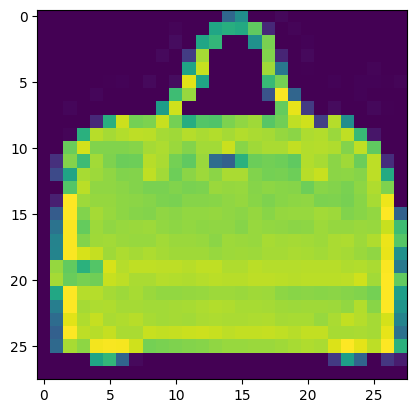

In [5]:
plt.figure()
plt.imshow(np.squeeze(x_train[220]))


In [6]:
y_train[220]

np.uint8(8)

In [7]:
#  Normalize the pixel values to be in the range [0, 1]
x_train=x_train/255
x_test=x_test/255

In [8]:
 # Reshape the input data to fit the CNN input format
# CNN expects 4D input: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from keras import layers

### Building the CNN model

In [10]:
# #  Build the CNN model
# cnn_model = Sequential()
# # First Convolutional Layer with 32 filters and ReLU activation
# cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

# # First MaxPooling layer to reduce spatial dimensions
# cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# # # Flatten the 3D output to 1D for the Dense layers
# cnn_model.add(Flatten())

# cnn_model.add(Dense(32, activation='relu'))

# cnn_model.add(Dense(10, activation='sigmoid'))

In [11]:
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\athar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,378 (274.91 KB)

 Trainable params: 70,378 (274.91 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [13]:
cnn_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=Adam(learning_rate=0.001), 
                  metrics=['accuracy'])

### Train the model

In [16]:
history = cnn_model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7416 - loss: 0.7237 - val_accuracy: 0.8605 - val_loss: 0.3927
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8743 - loss: 0.3525 - val_accuracy: 0.8795 - val_loss: 0.3333
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8918 - loss: 0.2978 - val_accuracy: 0.8918 - val_loss: 0.2920
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9020 - loss: 0.2695 - val_accuracy: 0.8847 - val_loss: 0.3301
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9150 - loss: 0.2326 - val_accuracy: 0.9072 - val_loss: 0.2611


### Evcaluation : testing data splits

In [17]:
# testing datasets evaluation
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f'Test accuracy of testing dataset: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9049 - loss: 0.2801
Test accuracy of testing dataset: 0.9017000198364258


### Making Predictions

In [18]:
# Predicts output probabilities for each image in x_test dataset
predictions = cnn_model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


### Checking the predicted and actual classes

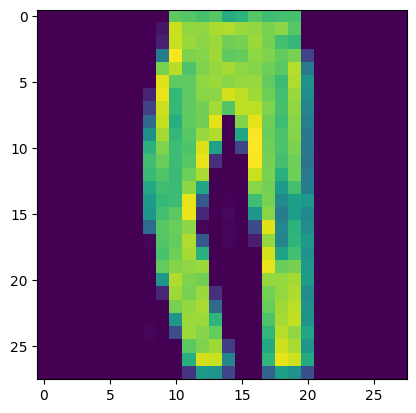

In [19]:
# choosing an image from testing split and showing
img = x_test[5]
plt.imshow(img)

In [20]:
# Finding the predicted class from 'predictions'
y_predict = class_names[np.argmax(predictions[5])]
y_predict

'Trouser'

In [21]:
# Checking the 'Actual' class from y_test
y_actual = class_names[y_test[5]]
y_actual

'Trouser'

In [22]:
print("Predicted label =", y_predict)
print("Actual Label =", y_actual)

Predicted label = Trouser
Actual Label = Trouser


### Evaluation : training data splits

In [23]:
# Training dataset evaluation
test_loss, test_acc = cnn_model.evaluate(x_train, y_train)
print(f'Test accuracy: {test_acc}')


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9291 - loss: 0.1964
Test accuracy: 0.9254666566848755


### Plotting

In [24]:
history.history
history.history.keys()
#The history object stores all the training progress: Training loss and accuracy , since we usesd while fitting the datasets

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

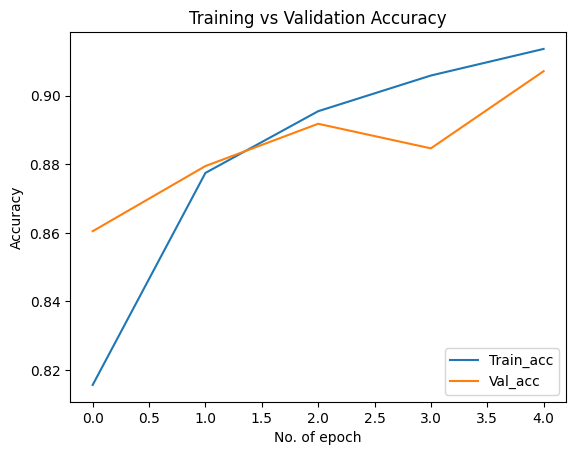

In [25]:
# comparing Accuracy of model on'Training data' and 'Validation data' 
# 'accuracy': Accuracy of the model on training data
# 'val_accuracy': Accuracy on validation data

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("No. of epoch")
plt.ylabel("Accuracy")
plt.legend(['Train_acc', 'Val_acc'], loc='lower right')
plt.show()